# MATH 210 Introduction to Mathematical Computing

## March 17, 2017

* Solving differential equations with scipy.integrate.odeint

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Solving differential equations with scipy.integrate.odeint

A differential equation is an equation invovling an unknown function $y(t)$ and its derivatives $y'(t),y''(t),\dots$.

For example, $y(t) = \sin(t)$ is a solution of the second order differential equation $y'' + y = 0$.

The order of a differential equation is the highest order derivative of the unknown funcion $y$ which appears in the equation.

For example, $y' + 2y = t$ is a first order equation and $y'' + 2y' -y = e^t$ is a order equation.

A differential equation is linear if it only invovles %y% and its derivatives on their own.

For example, $y''' + 3y'' + y = \sin(t)$ is a linear equation, and $y' + y^2 = 0$ is nonlinear and $y'' + \sin(y) = 0$ is also nonlinear.

Solving nonlinear differential equations explictitly is usually impossible but we can always approximate solutions numerically.

### odeint

The main ODE solver in SciPy is `scipy.integrate.odeint`. Let's take a look at the documentation.

In [4]:
import scipy.integrate as spi

In [5]:
spi.odeint?

We see that `odeint` takes 3 positional arguments `func`, `y0` and `t` where `func` describes the left side of a first order differential eqaution $y' = f(y,t)$, `y0` are the initial conditions and `t` is an array of $t$ values where we want to approximate $y(t)$.

### Example: $y' = y$, $y(0) = 1$

We know the solution is $y(t) = e^t$. Let's use `odeint` to solve the equation numerically and compare to the true solution.

In [6]:
# Function defining right side of y' = f(y,t)
# In this case, f(y,t) = y
def f(y,t):
    return y

In [7]:
# Initial condition
y0 = 1

In [8]:
# Array of t values where we want y(t)
# The first t value must be t = 0, corresponding to the initial condition y(0) = 1
t = np.linspace(0,2,100)

In [10]:
y = spi.odeint(f,y0,t)

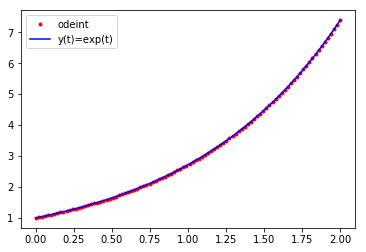

In [13]:
# Compare with the true solution y(t) = e^t
Y = np.exp(t)
plt.plot(t,y,'r.',t,Y,'b'),plt.legend(['odeint','y(t)=exp(t)']);

### Example: $y' = \sin(y)$,$y(0) = 1$

It is possible to solve this equation explicitly: can you solve $\int \frac{1}{\sin(y)}dt$?

In [14]:
from sympy import Symbol, sin

In [41]:
y = Symbol('y')

In [42]:
f = 1/sin(y)

In [43]:
from sympy.integrals import integrate

In [44]:
integrate(f,y)

log(cos(y) - 1)/2 - log(cos(y) + 1)/2

In [45]:
def f(y,t):
    return np.sin(y)

In [46]:
y0 = 1

In [47]:
t = np.linspace(0,10,100)

In [48]:
y = spi.odeint(f,y0,t)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


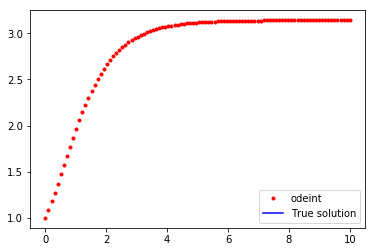

In [49]:
# Compare to the true solution
Y = np.log(np.cos(t) - 1)/2 - np.log(np.cos(t) +1)/2
plt.plot(t,y,'r.',t,Y,'b'),plt.legend(['odeint','True solution']);

### Example: $y' = \sin(y) + \cos(2y)$, $y(0) = 1$

In [50]:
def f(y,t):
    return np.sin(y) + np.cos(2*y)

In [51]:
y0 = 1

In [52]:
t = np.linspace(0,5*np.pi,100)

In [53]:
y = spi.odeint(f,y0,t)

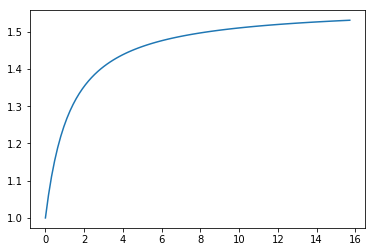

In [54]:
plt.plot(t,y)